In [1]:
%matplotlib inline
from sklearn import manifold as mani
from sklearn.decomposition import TruncatedSVD
import predictability_svd_final as psf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataDict,vDict = psf.loadFiles()

In [22]:
dataDict['1'][1].shape

(54936, 140)

## Consolidates the multiple arrays from the loaded dictionary

In [23]:
data = np.empty(shape=(0,dataDict['1'][1].shape[1]))
labels = np.empty(shape=(0,1))
for n,x in enumerate(dataDict):
    print(n)
    inter = np.tile(int(x),dataDict[x][1].shape[0]).reshape(-1,1)
    data = np.vstack((data, dataDict[x][1]))
    labels = np.vstack((labels, inter))

0
1
2
3
4
5
6
7


Computes a rolling mean with a window of 15 of the dataset.

In [13]:
data_roll = np.empty(data.shape)
for x in range(data_roll.shape[0]):
    data_roll[x] = data[x:x+15].sum(axis=0)/15
data = data_roll

## Uses SVD and reduces the data to the 3 most important dimensions

In [14]:
%%time
SVD = TruncatedSVD(n_components=3)
t_data = SVD.fit_transform(data)

Wall time: 1.55 s


Plots the 2nd and 3rd dimensions of the SVD

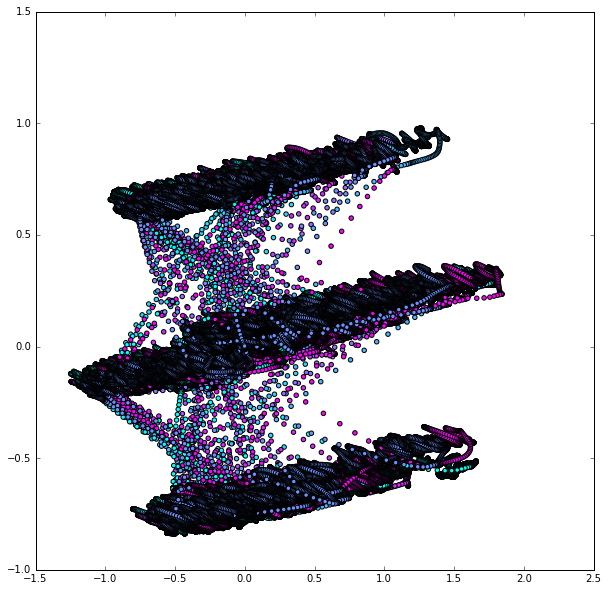

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(t_data[:,1],t_data[:,2], c=labels, cmap='cool' )

Plots the first and 3rd dimensions of the SVD

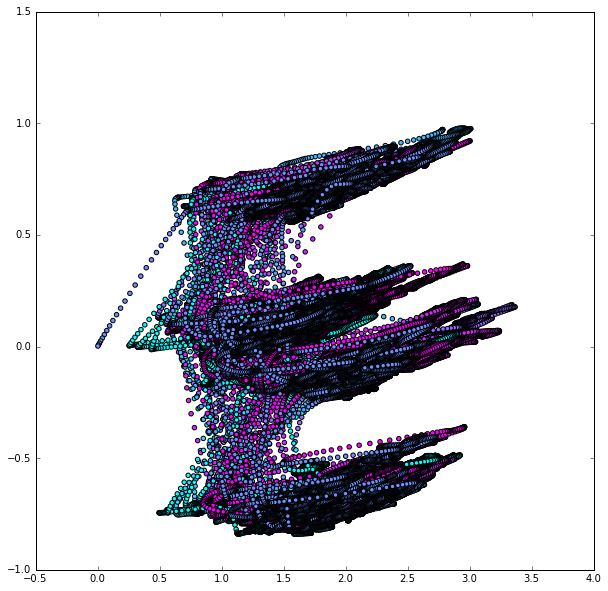

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(t_data[:,0],t_data[:,2], c=labels, cmap='cool' )

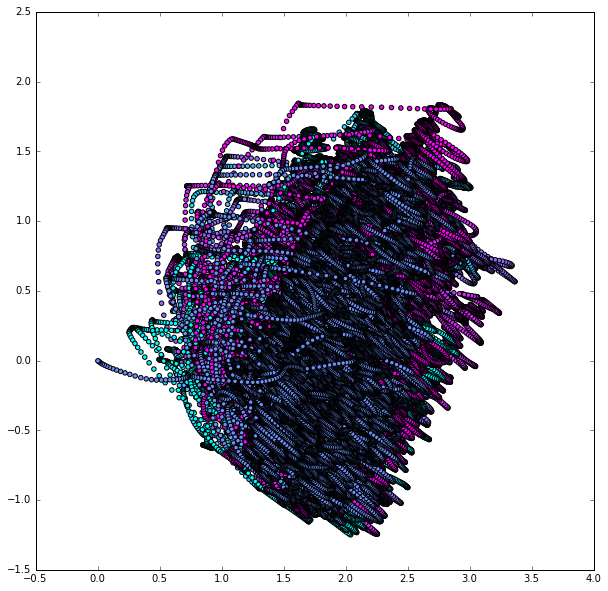

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(t_data[:,0],t_data[:,1], c=labels, cmap='cool' )

## tSNE to 2D space

In [26]:
data.shape


(365912, 140)

Takes chunks out of the data array and averages them, then assigns the labels based on the first row of that chunk.
For temporal pooling.

In [36]:
%%time
reduced_data = np.empty((20000,data.shape[1]))
reduced_labels = np.empty((20000))
random_rows = np.random.choice(data.shape[0], size=20000, replace=False)
for x in range(20000):
    reduced_labels[x] = labels[random_rows[x]]
    reduced_data[x,:] = np.sum(data[random_rows[x]:random_rows[x]+15,:], axis=0)/15

# reduced_data = data[random_rows, :]
# reduced_labels = labels[random_rows,:]

tsne = mani.TSNE(n_components=2, method='barnes_hut')
t_data_2 = tsne.fit_transform(reduced_data)

Wall time: 11min 23s


tSNE on dataset of 20,000 random samples

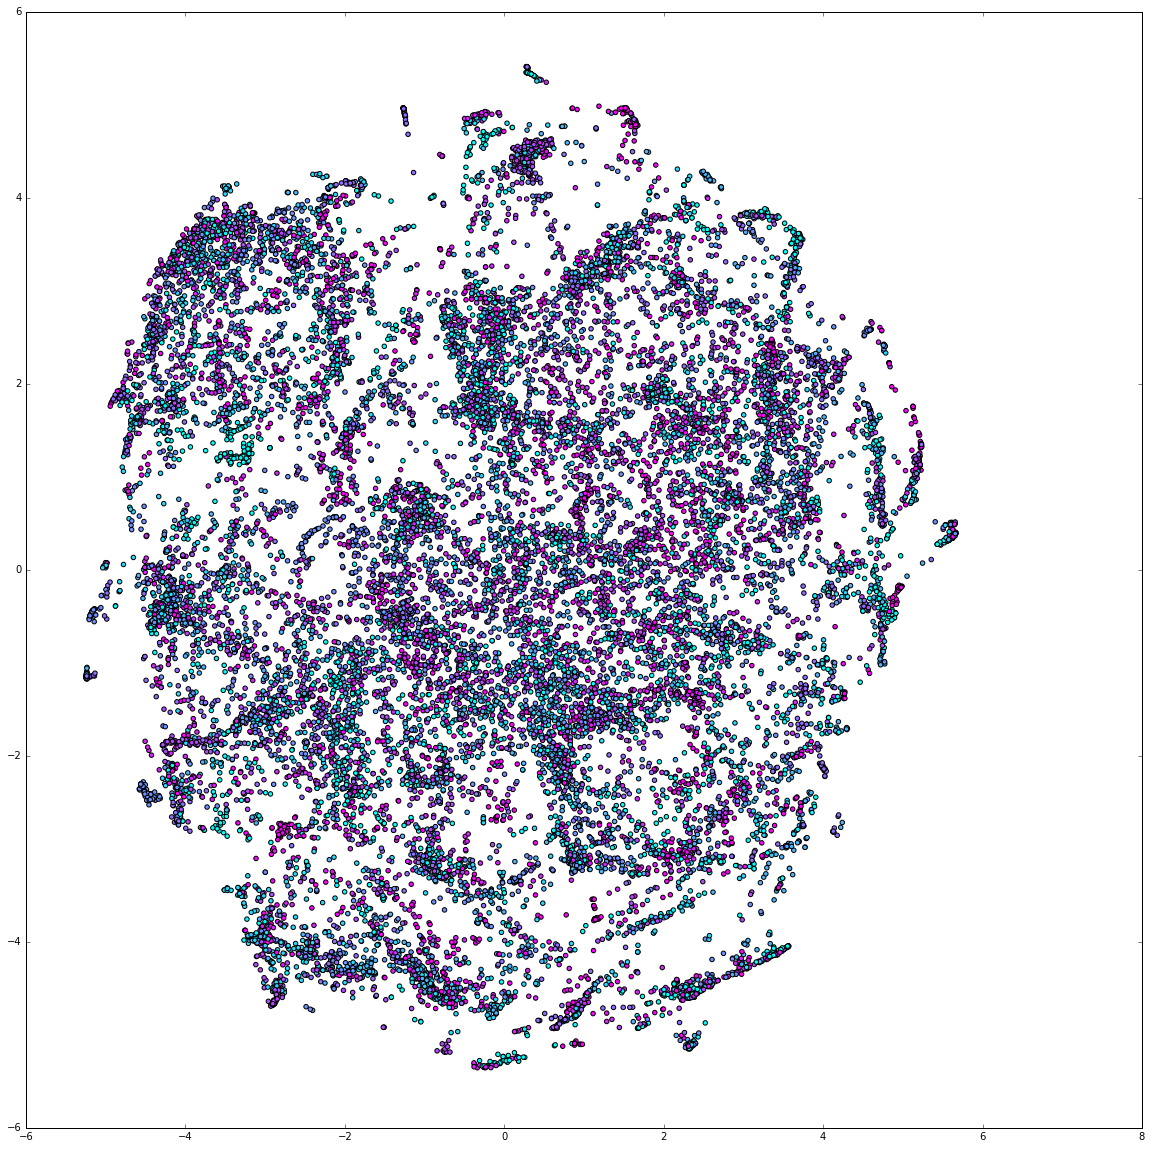

In [37]:
plt.figure(figsize=(20,20))
plt.scatter(t_data_2[:,0],t_data_2[:,1], c=reduced_labels, cmap='cool')